## Introduction to Nonlinear Dynamics HW1: Pratik Aghor
## Dynamics of $2x \textrm{ mod } 1$ map 

In [1]:
using LinearAlgebra
using Plots

In [2]:
f(x) = mod(2x, 1)

f (generic function with 1 method)

In [3]:
# check f(x)
@show f(3//5)
@show f(7//5)

f(3 // 5) = 1//5
f(7 // 5) = 4//5


4//5

In [4]:
# iterate f n times, given an initial condition x0
function fIter(f, x0, nIter)
    
    for i = 1:nIter
        print("i = ", i, "\t f(x) = ", f(x0), '\n')
        # update for iteration
        x0 = f(x0)
    end
end

fIter (generic function with 1 method)

In [5]:
fIter(f, 4//7, 7)

i = 1	 f(x) = 1//7
i = 2	 f(x) = 2//7
i = 3	 f(x) = 4//7
i = 4	 f(x) = 1//7
i = 5	 f(x) = 2//7
i = 6	 f(x) = 4//7
i = 7	 f(x) = 1//7


In [6]:
function plot2xmod1()
    # define x between 0 and 1
    nx = 100
    mid= Int64(nx/2)
    x = range(0.0, stop=1.0, length=nx)
    y = zeros(nx)
    y = f.(x) # dot is to apply f element-wise    
    plot!(x[1:mid-1], y[1:mid-1], color=:blue, linewidth =:2)
    plot!(x[mid+1:nx-1], y[mid+1:nx-1], color=:blue, linewidth =:2)
    plot!(x, x, color=:red, linestyle =:dash, linewidth=:2)
    scatter!([x[1], x[mid+1], x[nx]], [y[1], y[mid+1], y[nx]], markercolor=:blue, markersize=8)
    scatter!([x[mid], x[nx-1]], [y[mid], y[nx-1]], markershape=:circle, markercolor=:white, markersize=8)
    plot!(legend=false, xlabel="x",ylabel="f(x) = 2x mod 1", xlims=(-0.001,1.1), ylims=(-0.001,1.1))
end

plot2xmod1 (generic function with 1 method)

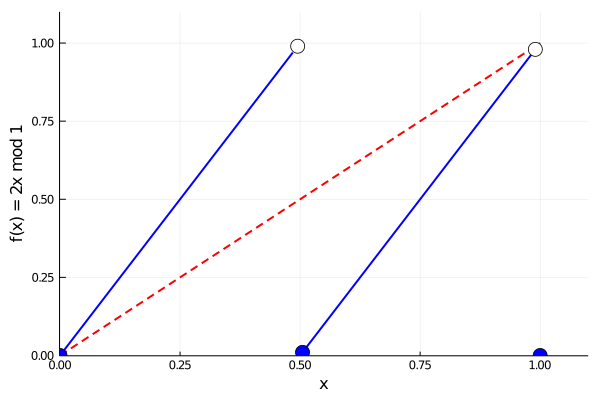

In [7]:
plot2xmod1()

In [8]:
# an inefficient, naive way to make cobwebplots
function cobwebplot_naive(f, x0, nIter)
    x = zeros(2*nIter+1)
    y = zeros(2*nIter+1)
    x[1] = x0
    y[1] = f(x0)
    for i=2:2*nIter+1
        x[i] = y[i-1]
        y[i] = f(x[i-1])
    end
    plot2xmod1()
    plot!(x, y, color=:black, linewidth =:2)
end

cobwebplot_naive (generic function with 1 method)

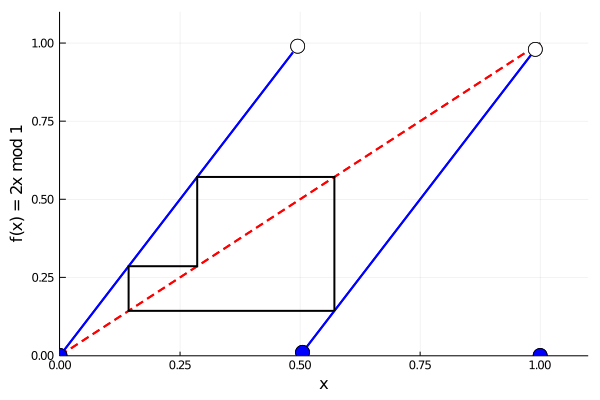

In [9]:
cobwebplot_naive(f, 4//7, 3)

In [10]:
# a more direct way (as compared to cobwebplot_naive) to make cobwebplots
function cobwebplot_direct(f, x0, nIter)
    plot() # create a new plot instant
    for i=1:nIter+1
        x1 = f(x0)
#         IJulia.clear_output(true) # for plotting inside for loop
        plot!([x0, x1], [x1, x1], color=:black, linewidth =:2)
        plot!([x1, x1], [x1, f(x1)], color=:black, linewidth =:2)
        x0 = x1 # update for next iteration
    end
    plot2xmod1()
end

cobwebplot_direct (generic function with 1 method)

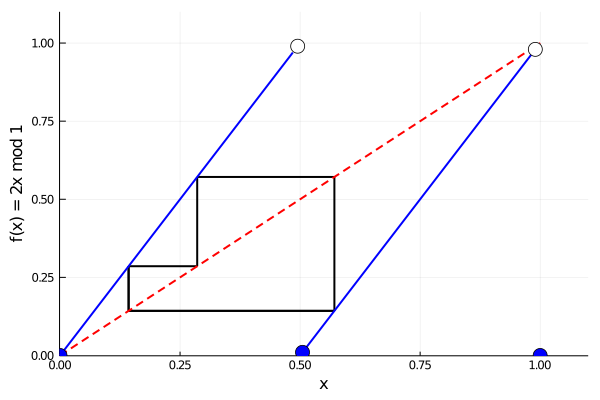

In [11]:
cobwebplot_direct(f, 4//7, 3)

## Q 2 and 3. Distinct periodic orbits upto period 4 and their cobweb plots:

### Period 1-orbits: trivial - (0)
### Period 2-orbits:
* We know that 2x mod 1 map acts on binary numbers by shifting the sequence by 1 bit, dropping the 1's before the point.
* The only two options for a period-2 orbit are $0.\overline{.01}$ and $0.\overline{10}$ and in fact, they change into one another under the action of 2x mod 1 map. 
* Therefore, there is only 1 period-2 orbit
* We must convert the binary string $0.\overline{01}$ into rationals and then use cobwebplot function to plot the period-2 orbit.
* $0.\overline{01}= 1/3$ in rationals and $f(1/3) = 2/3$. $\{1/3, 2/3\}$ form the only 2-orbit.

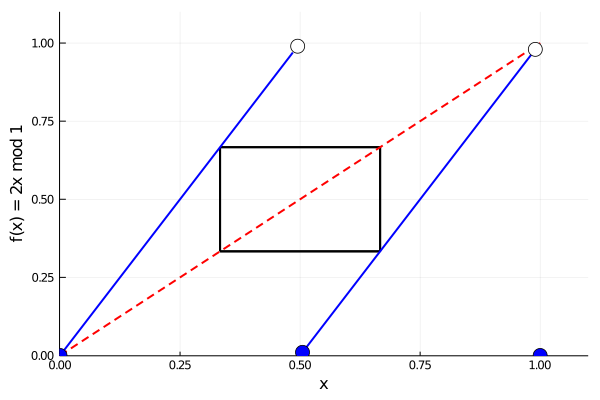

In [12]:
cobwebplot_direct(f, 1//3, 3)

### Period 3-orbits:
* Let's start with period-3 orbit at $f(0.\overline{001}) = 0.\overline{010}, f(0.\overline{010}) = 0.\overline{100}$. Finally, $f(0.\overline{100}) = 0.\overline{001}$
* Hence $\{0.\overline{001}, 0.\overline{010}, 0.\overline{100} \}$ form a 3-orbit of the 2x mod 1 map
* In rationals: 
$$
\begin{align}
    \begin{split}
        2^{3} \cdot 0.\overline{001} &= 1.\overline{001}\\
        -0.\overline{001} &= 0.\overline{001} \\
         \hline &\\
         7 \cdot 0.\overline{001} &= 1 \\
         0.\overline{001} & = 1/7        
    \end{split}
\end{align}
$$

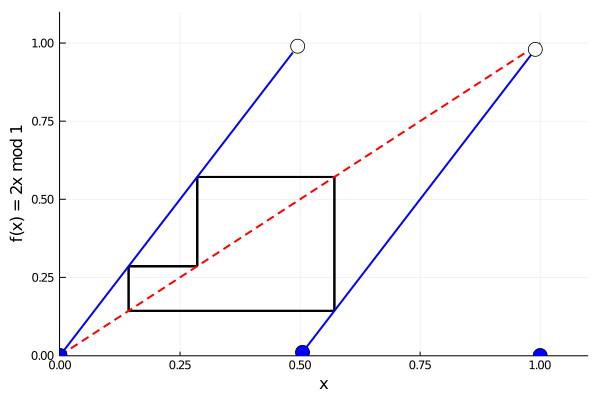

In [13]:
cobwebplot_direct(f, 1//7, 6)

### Period 3-orbits cntd.:
* However, that is not all. There are other recurring combinations possible, for example, consider $f(0.\overline{011}) = 0.\overline{110}, f(0.\overline{110}) = 0.\overline{101}, f(0.\overline{101}) = 0.\overline{011}$.
* Hence $\{0.\overline{011}, 0.\overline{110}, 0.\overline{101} \}$ form a 3-orbit of the 2x mod 1 map
* NOTE: No other 3-orbits are possible. Why? Becase to have a 3-orbit, we need 3-digit combination recurring. In binary, that means we have $2^{3}$ possibilities (2 options for each of the 3 digits). Out of these, $0.\overline{000}$ and $0.\overline{111}$ are not of interest. We are left with 6 possibilities and two 3-orbits described above exhast them all.

* Similarly,
$$
\begin{align}
    \begin{split}
        2^{3} \cdot 0.\overline{011} &= 11.\overline{011}\\
        -0.\overline{011} &= 0.\overline{011} \\
         \hline &\\
         7 \cdot 0.\overline{011} &= 11 \textrm{ (in binary)} \\
         0.\overline{001} & = 3/7        
    \end{split}
\end{align}
$$

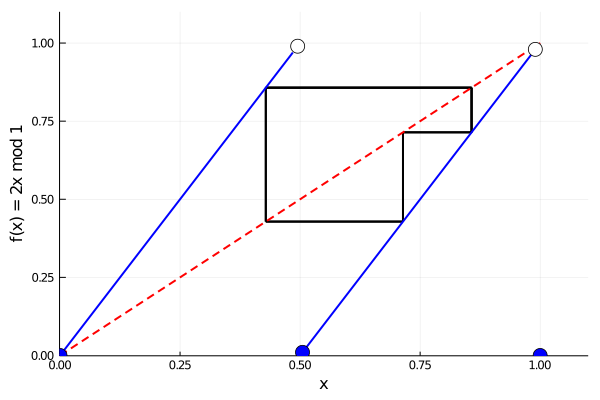

In [14]:
cobwebplot_direct(f, 3//7, 6)

### Period 4-orbits:
* First let's calculate how many period-4 points will be there. We need recurring 4-digit patterns in binary, so we have a sum total of $2^{4} = 16$ options. 
* Out of these, as before, $0.\overline{0000}$ and $0.\overline{1111}$ are not of interest. So we are left with $14$ options.
* Furthermore, there will be repeats of 2-cycles, which are not distinct 4-cycles, for example, $0.\overline{.0101}$ and $0.\overline{1010}$. Hence we must subtract them off.
* We are hence left with $12$ possibilities, each orbit having $4$ periodic points, hence there will be $3$ distinct period-4 orbits.
* Let's start with period-4 orbit at $0.\overline{0001}$ (in binary)
* $f(0.\overline{0001}) = 0.\overline{0010}, f(0.\overline{0010}) = 0.\overline{0100}, f(0.\overline{0100}) = 0.\overline{1000}$. Finally, $f(0.\overline{1000}) = 0.\overline{0001}$
* Hence $\{0.\overline{0001}, 0.\overline{0010}, 0.\overline{0100}, 0.\overline{1000} \}$ form a 4-orbit of the 2x mod 1 map
* In rationals: 

$$
\begin{align}
    \begin{split}
        2^{4} \cdot 0.\overline{0001} &= 1.\overline{0001}\\
        -0.\overline{0001} &= 0.\overline{0001} \\
         \hline &\\
         15 \cdot 0.\overline{0011} &= 1 \textrm{ (in binary)} \\
         0.\overline{0001} & = 1/15     
    \end{split}
\end{align}
$$

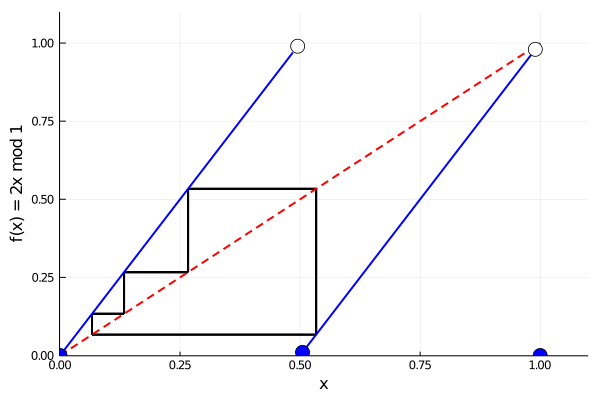

In [15]:
cobwebplot_direct(f, 1//15, 10)

#### Period 4-orbits cntd.:

* Now consider $f(0.\overline{0011}) = 0.\overline{0110}$, $f(0.\overline{0110}) = 0.\overline{1100}$, $f(0.\overline{1100}) = 0.\overline{1001}$, $f(0.\overline{1001}) = 0.\overline{0011}$. 
* Hence $\{0.\overline{0011}, 0.\overline{0110}, 0.\overline{1100}, 0.\overline{1001} \}$ form a 4-orbit of the 2x mod 1 map.
$$
\begin{align}
    \begin{split}
        2^{4} \cdot 0.\overline{0011} &= 11.\overline{0011}\\
        -0.\overline{0011} &= 0.\overline{0011} \\
         \hline &\\
         15 \cdot 0.\overline{0011} &= 11 \textrm{ (in binary)} \\
         0.\overline{0011} & = 3/15   = 1/5     
    \end{split}
\end{align}
$$

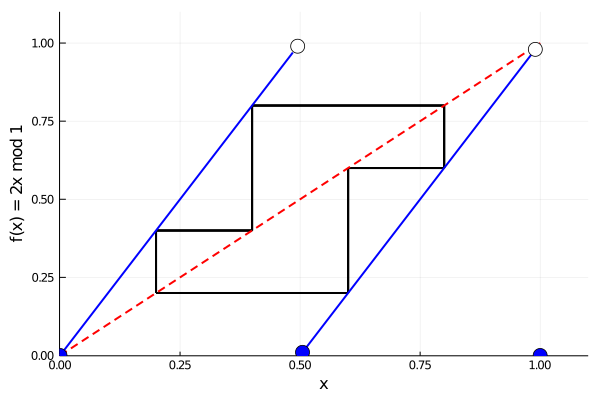

In [16]:
cobwebplot_direct(f, 1//5, 10)

#### Period 4-orbits cntd.:

* Finally, consider $f(0.\overline{0111}) = 0.\overline{1110}, f(0.\overline{1110}) = 0.\overline{1101}, f(0.\overline{1101})= 0.\overline{1011}, f(0.\overline{1011}) = 0.\overline{0111}$ 
* Hence $\{0.\overline{0111}, 0.\overline{1110}, 0.\overline{1101}, 0.\overline{1011} \}$ form a 4-orbit of the 2x mod 1 map. 
* In rationals:
$$
\begin{align}
    \begin{split}
        2^{4} \cdot 0.\overline{0111} &= 111.\overline{0111}\\
        -0.\overline{0111} &= 0.\overline{0111} \\
         \hline &\\
         15 \cdot 0.\overline{0111} &= 111 \textrm{ (in binary)} \\
         0.\overline{0111} & = 14/15     
    \end{split}
\end{align}
$$

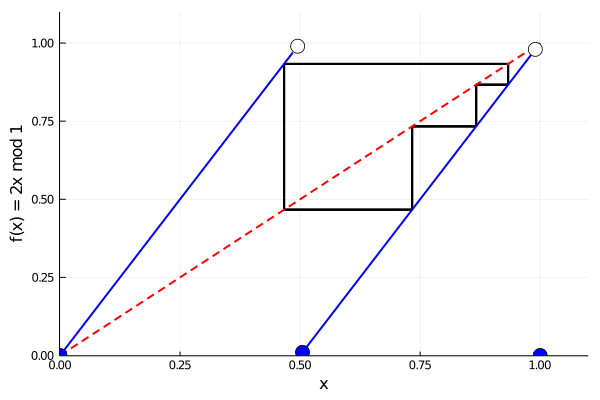

In [17]:
cobwebplot_direct(f, 14//15, 10)

## Q3. Discussion Questions:

### (a), (b) and (c) Given a rational number, can you determine or express in closed form the period of its periodic orbit? If not, can you give an upper bound on the period? Can you relate the dynamics of the periodic orbits to number theory?

Ans. The dynamics of the periodic orbits of the $2x mod 1$ map is related to modular arithmatic in the following way. Consider a rational number $p/q$. 

* $\frac{p}{q} \textrm { mod } 1 \equiv \frac{p \textrm{ mod } q}{q}$

* $p \textrm{ mod } q $ will have $q$ elements $\{\overline{0}, \overline{1}, ..., \overline{q-1} \}$. Hence, we have $q-1$ non-trivial options to choose from. 
* Let's do some numerical experiments:

In [18]:
fIter(f, 7//12, 5) # settles to a 2-orbit

i = 1	 f(x) = 1//6
i = 2	 f(x) = 1//3
i = 3	 f(x) = 2//3
i = 4	 f(x) = 1//3
i = 5	 f(x) = 2//3


In [19]:
fIter(f, 7//48, 7) # settles to the same 2-orbit!

i = 1	 f(x) = 7//24
i = 2	 f(x) = 7//12
i = 3	 f(x) = 1//6
i = 4	 f(x) = 1//3
i = 5	 f(x) = 2//3
i = 6	 f(x) = 1//3
i = 7	 f(x) = 2//3


* Above examples show that the $ 2x \textrm{ mod } 1$ map reduces powers of $2$ from the denominator. 
* Hence, if we have $q = 2^{k}p_{1}^{k_{1}}p_{2}^{k_{2}}...p_{n}^{k_{n}}$, where $p_{i}$'s are primes, the factor $2^{k}$ will not contribute in the counting of periodic points.
* Let's then consider the following case:

In [20]:
# fIter(f, 1//15, 10) # period-4 orbit

In [21]:
# fIter(f, 3//15, 10) # period-4 orbit, x0= 1//5

In [22]:
# fIter(f, 1//25, 22) # period-20 orbit

In [23]:
# fIter(f, 1//11, 13) # period-10 orbit

* From the above examples, we see that if we have a rational $1/q$, with $q$ being a prime, the period of the resulting periodic orbit of the $2 x \textrm{ mod }1$ map is going to be, **at max**, $q-1$.  
* Now let us consider $2 x \textrm{ mod }1$ map of $1/q$, where $q$ is not a prime, but say $q = 2^{k}q_{1}^{k_{1}}q_{2}^{k_{2}}...q_{n}^{k_{n}}$
* As discussed earlier, the $2^{k}$ factor will not matter. 
* Also, we guess that it has to do with the number of coprime integers less than $q$, since the iterations of $2 x \textrm{ mod }1$ map will cycle through these integers. Hence, the guess is that we will have some intimate connection with the Euler's $\varphi$-function, which gives the number of (positive) coprime integers less than $q$.  
* For concreteness and intuition, we consider a few specific examples: 
1. Consider $q = 18 = 2 \cdot 3^{2}$. As discussed, $2$ does not matter when counting periodic points. According to the convention, we assign $q_{1} = 3$, $k_{1} = 2$.
2. Consider $q = 45 =  3^{2} \cdot 5$. According to the convention, we assign $q_{1} = 3$, $k_{1} = 2$, $q_{2} = 5$, $k_{2} = 1$.
3. Consider $q = 225 = 3^{2} \cdot 5^{2}$. According to the convention, we assign $q_{1} = 3$, $k_{1} = 2$, $q_{2} = 5$, $k_{2} = 2$.
4. Consider $q = 63 = 3^{2} \cdot 7$. According to the convention, we assign $q_{1} = 3$, $k_{1} = 2$, $q_{2} = 7$, $k_{2} = 1$.
5. Consider $q = 175 = 5^{2} \cdot 7$. According to the convention, we assign $q_{1} = 5$, $k_{1} = 2$, $q_{2} = 7$, $k_{2} = 1$.
6. Consider $q = 135 = 3^{3} \cdot 5$. According to the convention, we assign $q_{1} = 3$, $k_{1} = 3$, $q_{2} = 5$, $k_{2} = 1$.
7. Consider $q = 189 = 3^{3} \cdot 7$. According to the convention, we assign $q_{1} = 3$, $k_{1} = 3$, $q_{2} = 7$, $k_{2} = 1$.


In [24]:
# fIter(f, 1//18, 8) # period-6 orbit

In [25]:
# fIter(f, 1//45, 20) # period-12 orbit

In [26]:
# fIter(f, 1//225, 60) # period-60 orbit

In [27]:
# fIter(f, 1//63, 20) # period-6 orbit

In [28]:
# fIter(f, 1//175, 60) # period-60 orbit

In [29]:
# fIter(f, 1//135, 40) # period-36 orbit

In [30]:
# fIter(f, 1//189, 19) # period-18 orbit

| q      | prime factorization | period     |
| :---   |    :----:   |          ---: |
| $18$   | $2\cdot3^{2}$ | $6$ |
| $45$  | $3^{2} \cdot 5$ | $12$   |
| $135$   | $ 3^{3} \cdot 5$ | $36$   |
| $63$   | $3^{2} \cdot 7$ | $6$   |
| $189$   | $3^{3} \cdot 7$ | $18$   |

* This table clearly indicates that the period of the periodic orbit generated from $1/q$ as the initial condition $\leq \phi(q)$, where $\phi(q)$ is the Euler's $\phi$-fucntion that gives the number of non-negative integers, less than $q$ that are relatively prime to $q$.
* In fact, it's
* If for $q = q_{1}^{k_{1}}q_{2}^{k_{2}}...q_{n}^{k_{n}}$, with $q_{i} > 2$ (we remove irrelavent factors of $2^{k}$), the the **upper bound** for the period is given by
* $\boxed{ \textrm { Period of the periodic orbit generated from } 1/q \leq \phi(q) = q_{1}^{k_{1}-1}\cdot(q_{1}-1)\cdot q_{2}^{k_{2}-1}\cdot(q_{2}-1)...q_{n}^{k_{n}-1}\cdot(q_{n}-1)
} 
$
* We also note that if $x_{0} = \frac{k}{2^{n}-1}$, then the period is equal to $n$.

### (d) Are there periodic orbits of all integer periods greater than or equal to 2?
* Necessarily, yes. We have seen that the $ 2x \textrm{ mod } 1$ map acts on binary numbers as a right-shift. Since each recurring sequence corresponds to some rational number, we can always form a periodic-point with period greater than or equal to 2.

### (e) How many orbits are there for a given period? If not an explicit formula, how about an upper bound?
Ans. 
* Let's start by giving an explicit formula for when the period is 'prime', say p. It's a combinatorics problem. We have 'p' boxes, in which we can fill either 0's or 1's. Hence, we have $2^{p}$ options to choose from. 
* However, as discussed above $0.\overline{0000}$ and $0.\overline{1111}$ are not of interest. Hence we are reduced to $2^{p}-2$ possibilities. 
* Each periodic point will lie on a period-p orbit. 
* Hence, $ \boxed{\textrm{the total number of periodic orbits } = \frac{2^{p}-2}{p}}$. 
* Now, let's consider a case when the period is not prime. As we counted above for period 4 orbits, we had to additionally exclude periodic points corresponding to the repeats of smaller cycles, $0.\overline{0101}$,$0.\overline{1010}$. 
* Hence, let's say if the specified period $m = \prod_{j=1}^{n} p_{j}^{k_{j}}$, then we can write
$ \boxed{\textrm{the total number of periodic orbits } = \frac{2^{m}-2 - \sum_{i=1}^{n} \left(\prod_{j=1, j\neq i}^{n} p_{j}^{k_{j}} \right)}{m}}$. 
* For example, consider period-6 orbits $6 = 2\cdot 3$. First of all, as before, we have $2^{6} - 2 = 62$ options to choose from.
* Furthermore, we must subtract periodic-points corresponding to periods $2$ and $3$, since they are not really $6-$cycles. We have $2$ period-$2$ points: $0.\overline{01}, 0.\overline{10}$ and $6$ period-$3$ points, namely, $0.\overline{001}, 0.\overline{010}, 0.\overline{100}, 0.\overline{011}, 0.\overline{110}$ and $0.\overline{101}$. * Subtracting repeats of these smaller cycles, we'll have $62 - 8 = 54$ options for period-$6$ points.
* Hence the number of period-$6$ orbits would be $54/6 = 9$.  

### (f) Formula for the stability of a periodic orbit:
* Let us say we have a periodic orbit of period **n**.
* The sequence $\{x_{1}, x_{2}, ... , x_{n}\}$ repeates itself under the map $f$.
* Alternatively, we can look at this periodic orbit as a fixed point of the $n^{th}$ iterate of the map $f$.
* To find the stability of a periodic point, say $x_{1}$, we know, $\frac{d f^{n}}{dx}\bigg|_{x_{1}} < 1$. 
* To simplify, let's start with the stability of a $2$-orbit $\{x_{1}, x_{2}\}$. We know, $f(x_{1}) = x_{2}$ and $f(x_{2}) = f(x_{1})$. 
$$
\begin{align}
    \begin{split}
        f^{2'}(x)|_{x_{1}} & = f'(f(x_{1}) )f'(x_{1}) \textrm{ ...chain rule}\\
        & = f'(x_{2})\cdot f'(x_{1}) \textrm{ ...} \because f(x_{1}) = x_{2}
    \end{split}
\end{align}
$$
* Now, let's consider a $3$-orbit: $\{x_{1}, x_{2}, x_{3}\}$. We know, $f(x_{1}) = x_{2}, f(x_{2}) = f(x_{3})$ and $f(x_{3}) = f(x_{1})$. This immediately gives $f^{2}(x_{1}) = x_{3}$.
$$
\begin{align}
    \begin{split}
        f^{3'}(x)|_{x_{1}} & = f'(f^{2}(x_{1}) )f^{2'}(x_{1}) \textrm{ ...chain rule}\\
        & = f'(x_{3})\cdot f^{2'}(x_{1}) \textrm{ ...} \because f^{2}(x_{1}) = x_{3}\\
        & = f'(x_{3})\cdot f'(f(x_{1}) )f'(x_{1}) \textrm{ ...chain rule}\\
        & = f'(x_{3})\cdot f'(x_{2})\cdot f'(x_{1})
    \end{split}
\end{align}
$$

* In general, we can write the stability criterion to be as follows:
$$
\boxed{ \textrm{Stable if } \prod_{i=1}^{n} f'(x_{i}) < 1
}
$$